In [ ]:
import random
from animalai.environment import AnimalAIEnvironment
from wrappers import CustomUnityToGymWrapper

In [ ]:
aai_seed = 0
port = 5005 + random.randint(
    0, 1000
)  # uses a random port to avoid problems if a previous version exits slowly
env_path = "/Users/Ile-Maurice/Desktop/MacOS/MacOS"
configuration_file = "./animal_ai_environments/yroom.yaml"
watch = True

aai_env = AnimalAIEnvironment(
    file_name=env_path,  # Path to the environment
    seed=aai_seed,  # seed for the pseudo random generators
    arenas_configurations=configuration_file,
    play=False,  # note that this is set to False for training
    base_port=port,  # the port to use for communication between python and the Unity environment
    inference=watch,  # set to True if you want to watch the agent play
    useCamera=True,  # set to False if you don't want to use the camera (no visual observations)
    resolution=84,
    useRayCasts=False,  # set to True if you want to use raycasts
    no_graphics=False,  # set to True if you don't want to use the graphics ('headless' mode)
    timescale=1,
)

env = CustomUnityToGymWrapper(
    aai_env, uint8_visual=False, allow_multiple_obs=True, flatten_branched=True
)  # the wrapper for the environment

# # fix for error generated by the gym wrapper on line 241, python3.10/site-packages/mlagents_envs/rpc_utils.py in _observation_to_np_array
# # use img = img.reshape(obs.shape)

In [ ]:
print(env.action_space)
# 0 - nothing
# 1 - rotate right by 6 degrees
# 2 - rotate left by 6 degrees
# 3 - accelerate forward
# 4 - accelerate forward and rotate CW by 6 degrees
# 5 - accelerate forward and rotate CCW by 6 degrees
# 6 - accelerate backward
# 7 - accelerate backward and rotate CW by 6 degrees
# 8 - accelerate backward and rotate CCW by 6 degrees


print(env.observation_space) # see python3.10/site-packages/animalai/environment.py, line 202
# Box(84, 84, 3) - rgb image
# Box(-inf, inf, (7,)) - (health; v1, v2, v3; p1, p2, p3)

In [ ]:
env.reset()

In [ ]:
# for i in range(60):
#     obs, reward, done, info = env.step(1)
#     print("health:", obs[1][1])
#     print("vel:", obs[1][1:4]) # (v?, v?, v forward/backard relative to starting orientation)
#     print("pos:", obs[1][4:7]) # (p?, p?, p forward/backard relative to starting orientation)

# for i in range(30):
#     obs, reward, done, info = env.step(4)
#     obs, reward, done, info = env.step(7)
#     print("health:", obs[1][1])
#     print("vel:", obs[1][1:4])
#     print("pos:", obs[1][4:7])

obs, reward, done, info = env.step(3)
print("obs[0] shape", obs[0].shape)
print("obs[0][0] ", obs[0][0])
print("health:", obs[1][1])
print("vel:", obs[1][1:4])
print("pos:", obs[1][4:7])

In [ ]:
env.close()

In [1]:
import random
from animalai.environment import AnimalAIEnvironment
from wrappers import CustomUnityToGymWrapper
from animalai_agent import AnimalAIVectorhashAgent
from vectorhash import build_vectorhash_architecture
import random

### vhash
shapes = [(3,3,4), (4,4,5)]
model = build_vectorhash_architecture(shapes, N_h=1200, input_size=84*84, initalization_method="by_sparsity", shift="conv")




### animalai
aai_seed = 0
port = 5005 + random.randint(
    0, 1000
)  # uses a random port to avoid problems if a previous version exits slowly
env_path = "/home/ezrahuang/AAI/LINUX/AAI.x86_64"
configuration_file = "./animal_ai_environments/yroom.yaml"
watch = True

aai_env = AnimalAIEnvironment(
    file_name=env_path,  # Path to the environment
    seed=aai_seed,  # seed for the pseudo random generators
    arenas_configurations=configuration_file,
    play=False,  # note that this is set to False for training
    base_port=port,  # the port to use for communication between python and the Unity environment
    inference=False,  # set to True if you want to watch the agent play
    useCamera=True,  # set to False if you don't want to use the camera (no visual observations)
    resolution=84,
    useRayCasts=False,  # set to True if you want to use raycasts
    no_graphics=False,  # set to True if you don't want to use the graphics ('headless' mode)
    timescale=0.1,
)

env = CustomUnityToGymWrapper(
    aai_env, uint8_visual=False, allow_multiple_obs=True, flatten_branched=True
)  # the wrapper for the environment





#### agent
agent = AnimalAIVectorhashAgent(model, env)
agent.vectorhash.certainty = 0.75

by_sparsity
module shapes:  [(3, 3, 4), (4, 4, 5)]
N_g     :  116
N_patts :  2880
N_h     :  1200
[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"


/home/ezrahuang/Projects/rl-research/vectorhash/hippocampal_sensory_layers.py:104: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3725.)
  1 + input.T @ self.inhibition_matrix_hs @ input


info for each h directly after learning it
h max, min, mean tensor(6.0819) tensor(-2.6365) tensor(1.6887)
h_from_s max, min, mean tensor(6.0801) tensor(-2.6357) tensor(1.6882)
h_from_s_denoised max, min, mean tensor(6.0818) tensor(-2.6363) tensor(1.6887)
avg nonzero/greaterzero h from book: tensor(1200) tensor(1082)
avg nonzero/greaterzero h from s: tensor(1200) tensor(1082)
avg nonzero/greaterzero h from s denoised: tensor(1200) tensor(1082)
mse/cosinesimilarity h from book and h from s tensor(4.1607e-07) tensor([1.])
mse/cosinesimilarity h from book and h from s denoised tensor(3.2185e-09) tensor([1.])
mse/cosinesimilarity s and s from h from s tensor(9.7419e-07) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(9.6851e-07) tensor([1.0000])
mse/cosinesimilarity s and s from h tensor(9.6748e-07) tensor([1.0000])


/home/ezrahuang/Projects/rl-research/vectorhash/vectorhash.py:81: UserWarning: Using a target size (torch.Size([1, 1200])) that is different to the input size (torch.Size([1200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.nn.functional.mse_loss(h, h_from_s),
/home/ezrahuang/Projects/rl-research/vectorhash/vectorhash.py:88: UserWarning: Using a target size (torch.Size([1, 1200])) that is different to the input size (torch.Size([1200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.nn.functional.mse_loss(h, h_from_s_denoised),
/home/ezrahuang/Projects/rl-research/vectorhash/vectorhash.py:104: UserWarning: Using a target size (torch.Size([1, 7056])) that is different to the input size (torch.Size([7056])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.nn.functional.mse_loss(s, s_from_h_from_

In [2]:
from test_utils import generate_animalai_path

path = generate_animalai_path(20)

In [3]:
agent.test_path(path)

img.shape (3, 84, 84)
obs.shape [84, 84, 3]
info for each h directly after learning it
h max, min, mean tensor(6.0819) tensor(-2.6365) tensor(1.6887)
h_from_s max, min, mean tensor(6.0807) tensor(-2.6360) tensor(1.6884)
h_from_s_denoised max, min, mean tensor(6.0818) tensor(-2.6363) tensor(1.6887)
avg nonzero/greaterzero h from book: tensor(1200) tensor(1082)
avg nonzero/greaterzero h from s: tensor(1200) tensor(1082)
avg nonzero/greaterzero h from s denoised: tensor(1200) tensor(1082)
mse/cosinesimilarity h from book and h from s tensor(1.7268e-07) tensor([1.])
mse/cosinesimilarity h from book and h from s denoised tensor(3.2181e-09) tensor([1.])
mse/cosinesimilarity s and s from h from s tensor(0.0001) tensor([0.9998])
mse/cosinesimilarity s and s from h from s denoised tensor(0.0001) tensor([0.9998])
mse/cosinesimilarity s and s from h tensor(0.0001) tensor([0.9998])
action spec:  Continuous: 0, Discrete: (3, 3)
validate action
discrete actions [[1 0]]
continuous actions []
n_agents

([(tensor(-0.), tensor(-0.), tensor(-0.))],
 [3, 6, 3, 8, 4, 7, 5, 5, 3, 3, 8, 3, 3, 7, 4, 1, 6, 6, 8, 5])

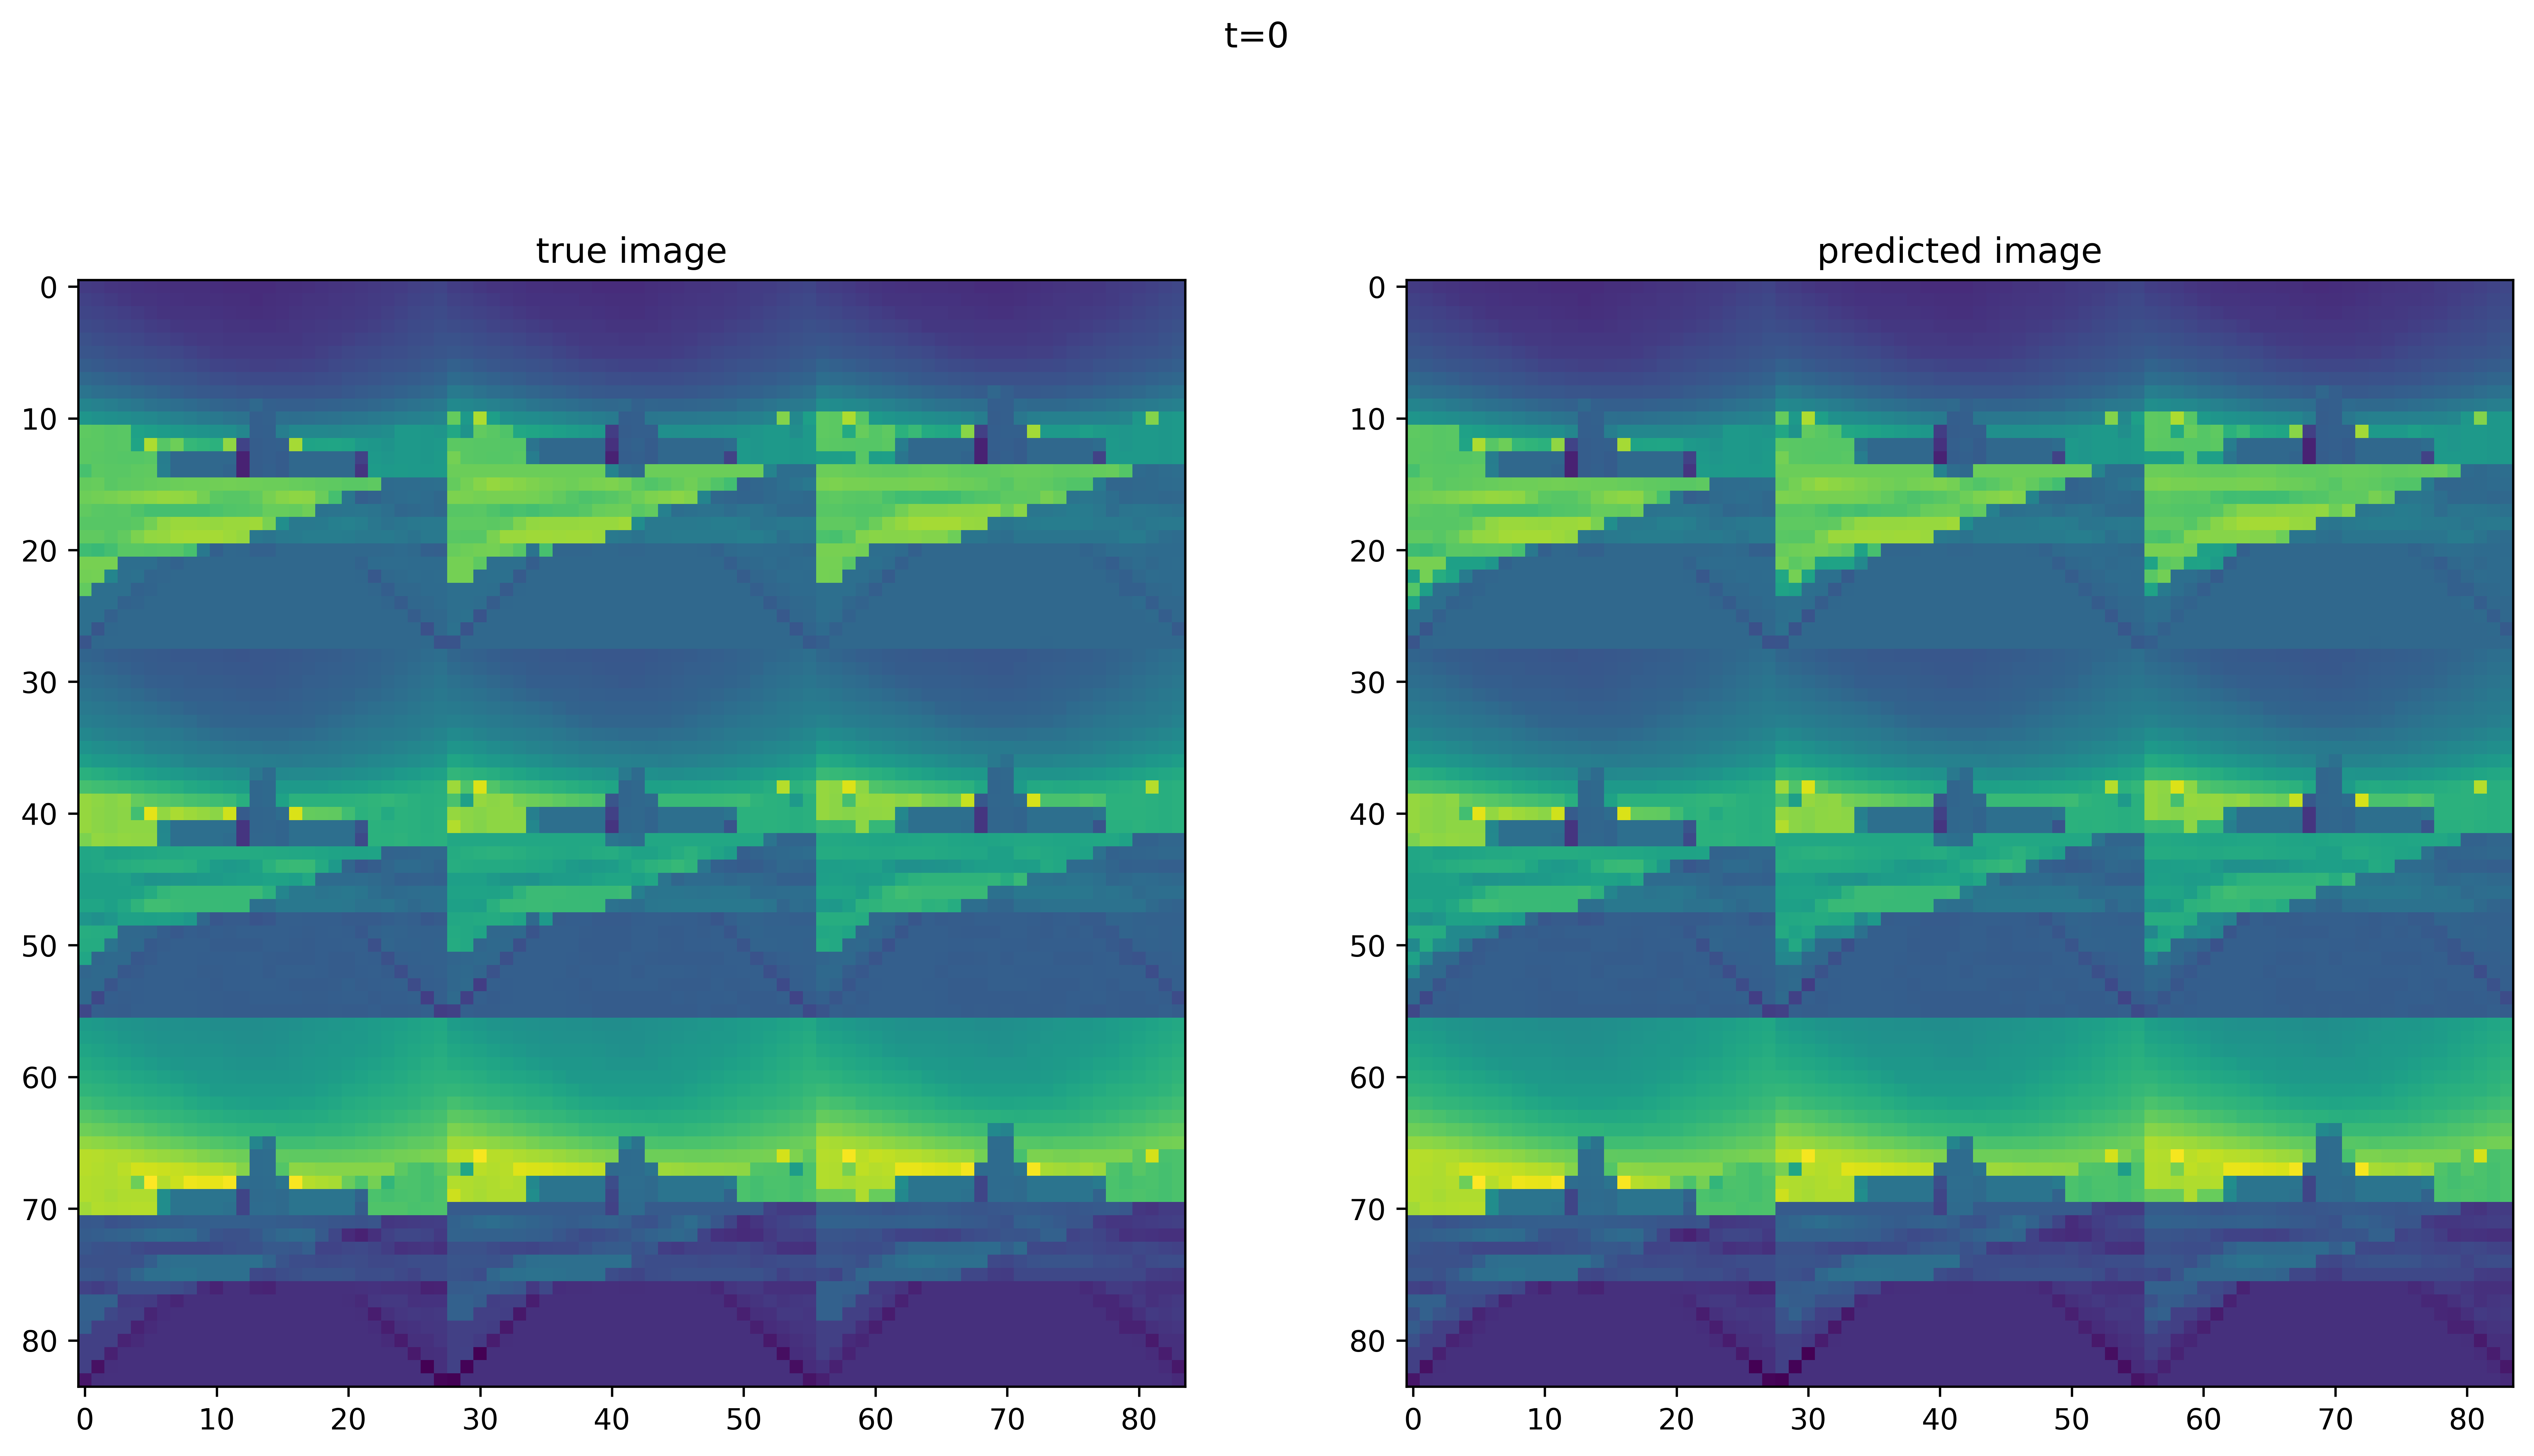

In [4]:
ani = agent.history.make_image_video()

In [7]:
ani.save("test.mp4", progress_callback=lambda current, total: print(f"frame {current}/{total}"), dpi=300)

frame 0/20
frame 1/20
frame 2/20
frame 3/20
frame 4/20
frame 5/20
frame 6/20
frame 7/20
frame 8/20
frame 9/20
frame 10/20
frame 11/20
frame 12/20
frame 13/20
frame 14/20
frame 15/20
frame 16/20
frame 17/20
frame 18/20
frame 19/20


In [ ]:
env.close()